## Reddit Sentiment Analysis

In [21]:
# !pip install vaderSentiment

In [22]:
import pandas as pd
import re
from datetime import datetime
import plotly.express as px
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.style as style
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

In [23]:
analyser = SentimentIntensityAnalyzer()

In [24]:
# Note: more details about the scoring: https://github.com/cjhutto/vaderSentiment#about-the-scoring
# The compound score is a normalised, weighted, composite score
# It is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). 

def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [25]:
# Read Reddit data set

posts = pd.read_csv('reddit_singapore_mar.csv')
posts['timestamp'] = posts['timestamp'].apply(lambda x: re.findall('\d+/\d+/\d+', x)[0])
posts['timestamp'] = posts['timestamp'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
posts.head()

,author,title,score,id,url,comms_num,created,body,timestamp
0,shian243,Singaporean student in London seeks eyewitness...,2936,fcn9km,https://www.straitstimes.com/singapore/singapo...,424,1583229539,NaN,2020-03-03
1,andylee69,Protection Level : Max,1959,fdrdib,https://i.redd.it/1jha4evfwsk41.jpg,89,1583419658,NaN,2020-03-05
2,satoshigekkouga2303,Singapore reports two deaths from Covid-19,1593,fm8vm4,https://www.straitstimes.com/singapore/singapo...,281,1584791447,NaN,2020-03-21
3,shian243,COVID-19: Singapore closes borders to all tour...,1594,fmt1xw,https://sg.news.yahoo.com/covid-19-singapore-c...,328,1584876271,NaN,2020-03-22
4,le_coder_boy,"Thank you, Grab driver :) (p.s. we didn't take...",1537,fbntfx,https://i.redd.it/o1yqc5at7zj41.jpg,33,1583060277,NaN,2020-03-01


In [26]:
# Get a list of Reddit posts (string)

posts_list = posts['title'].tolist()
posts_list[:10]

['Singaporean student in London seeks eyewitnesses after coronavirus-related taunt and assault',
 'Protection Level : Max',
 'Singapore reports two deaths from Covid-19',
 'COVID-19: Singapore closes borders to all tourists, short-term visitors',
 "Thank you, Grab driver :) (p.s. we didn't take any)",
 'Even cats can sense panic buying. This cat panic buying also.',
 'Free access to attractions. So I went up and took this shoot',
 'My parents are heroes.',
 'COVID-19 cases in Singapore reach 313 with 47 new infections, 33 imported',
 'Social Distancing has gone too far...']

In [27]:
# Get list of sentiment scores for posts

sentiment_score_list = []
for sentence in posts_list:
    sentiment_score = sentiment_analyzer_score(str(sentence))
    sentiment_score_list.append(sentiment_score)
    
sentiment_score_list[:10]

[-0.5859, 0.0, 0.0, 0.0, 0.6705, -0.765, 0.5187, 0.5106, 0.0258, 0.0]

In [28]:
# Add 'sentiment_score' column

posts['sentiment_score'] = sentiment_score_list
posts.head()

,author,title,score,id,url,comms_num,created,body,timestamp,sentiment_score
0,shian243,Singaporean student in London seeks eyewitness...,2936,fcn9km,https://www.straitstimes.com/singapore/singapo...,424,1583229539,NaN,2020-03-03,-0.5859
1,andylee69,Protection Level : Max,1959,fdrdib,https://i.redd.it/1jha4evfwsk41.jpg,89,1583419658,NaN,2020-03-05,0.0000
2,satoshigekkouga2303,Singapore reports two deaths from Covid-19,1593,fm8vm4,https://www.straitstimes.com/singapore/singapo...,281,1584791447,NaN,2020-03-21,0.0000
3,shian243,COVID-19: Singapore closes borders to all tour...,1594,fmt1xw,https://sg.news.yahoo.com/covid-19-singapore-c...,328,1584876271,NaN,2020-03-22,0.0000
4,le_coder_boy,"Thank you, Grab driver :) (p.s. we didn't take...",1537,fbntfx,https://i.redd.it/o1yqc5at7zj41.jpg,33,1583060277,NaN,2020-03-01,0.6705


In [29]:
# Get average sentiment on Reddit posts by date

average_sentiment_perday = posts[['sentiment_score', 'timestamp']].groupby(['timestamp'], as_index=False).mean()
average_sentiment_perday.columns = ['date', 'sentiment_score']

print(average_sentiment_perday.shape)
average_sentiment_perday[:10]

(29, 2)


,date,sentiment_score
0,2020-02-24,0.084290
1,2020-02-25,-0.020800
2,2020-02-26,0.092110
3,2020-02-27,-0.116657
4,2020-02-28,-0.067408
5,2020-02-29,0.005129
6,2020-03-01,0.263500
7,2020-03-02,0.111480
8,2020-03-03,-0.205833
9,2020-03-04,-0.060591


### Sentiment Over Time

In [30]:
fig = px.line(average_sentiment_perday, x='date', y='sentiment_score')
fig.show()

### Sentiment & Number of Cases

In [31]:
# Number of Cases Over Time

num_cases = pd.read_csv('SG_daily_cases.csv')
num_cases['date'] = num_cases['date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

num_cases.head()

,date,cases
0,2020-01-23,1
1,2020-01-24,2
2,2020-01-25,0
3,2020-01-26,1
4,2020-01-27,1


In [32]:
# Plot average sentiment and number of cases (dual axis) over time

# Create figure with secondary y-axis
fig3 = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig3.add_trace(
    go.Scatter(x=average_sentiment_perday['date'], y=average_sentiment_perday['sentiment_score'], name="Average Sentiment Score"),
    secondary_y=False,
)
fig3.add_trace(
    go.Scatter(x=num_cases['date'], y=num_cases['cases'], name="Number of COVID-19 Cases"),
    secondary_y=True,
)

# Add figure title
fig3.update_layout(
    title_text="Sentiment and Number of Cases Against Time"
)

# Set x-axis title
# fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
fig3.update_yaxes(title_text="Average Sentiment Score of Reddit Posts", secondary_y=False)
fig3.update_yaxes(title_text="Number of COVID-19 Cases Per Day", secondary_y=True)

# Set date range
fig3.update_layout(xaxis_range=['2020-02-24','2020-03-23'],
                    font=dict(
#                         family="Courier New, monospace",
#                         size=14,
                        color="#000"
                        )
                    )
                  
fig3.show()

In [33]:
# posts[posts['timestamp'] == '2020-03-21']

In [34]:
# posts[posts['timestamp'] == '2020-03-22']

### Sentiment Statistics

#### Label Sentiments Based on Sentiment Score

- <b>Negative:</b> sentiment score < 0
- <b>Neutral:</b> sentiment score = 0
- <b>Positive:</b> sentiment score > 0

In [35]:
# Label sentiments (positive, negative, neutral) based on sentiment_score for each post

posts['sentiment_score'].apply(lambda x: float(x))
posts['sentiment_label'] = 'NA'
posts.loc[posts.sentiment_score == 0, 'sentiment_label'] = 'neutral'
posts.loc[posts.sentiment_score < 0, 'sentiment_label'] = 'negative'
posts.loc[posts.sentiment_score > 0, 'sentiment_label'] = 'positive'
posts.head()

,author,title,score,id,url,comms_num,created,body,timestamp,sentiment_score,sentiment_label
0,shian243,Singaporean student in London seeks eyewitness...,2936,fcn9km,https://www.straitstimes.com/singapore/singapo...,424,1583229539,NaN,2020-03-03,-0.5859,negative
1,andylee69,Protection Level : Max,1959,fdrdib,https://i.redd.it/1jha4evfwsk41.jpg,89,1583419658,NaN,2020-03-05,0.0000,neutral
2,satoshigekkouga2303,Singapore reports two deaths from Covid-19,1593,fm8vm4,https://www.straitstimes.com/singapore/singapo...,281,1584791447,NaN,2020-03-21,0.0000,neutral
3,shian243,COVID-19: Singapore closes borders to all tour...,1594,fmt1xw,https://sg.news.yahoo.com/covid-19-singapore-c...,328,1584876271,NaN,2020-03-22,0.0000,neutral
4,le_coder_boy,"Thank you, Grab driver :) (p.s. we didn't take...",1537,fbntfx,https://i.redd.it/o1yqc5at7zj41.jpg,33,1583060277,NaN,2020-03-01,0.6705,positive


In [36]:
# Get number of posts for each sentiment

posts_persentiment = posts.groupby(['sentiment_label']).size().reset_index(name='num_posts')
posts_persentiment

,sentiment_label,num_posts
0,negative,107
1,neutral,169
2,positive,104


In [37]:
posts_persentiment['percentage_of_total'] = posts_persentiment['num_posts'].apply(lambda x: round(x / posts.shape[0],2) * 100)
posts_persentiment

,sentiment_label,num_posts,percentage_of_total
0,negative,107,28.0
1,neutral,169,44.0
2,positive,104,27.0


[Text(0, 0.5, 'Percentage of Reddit Posts'), Text(0.5, 0, 'Sentiment')]

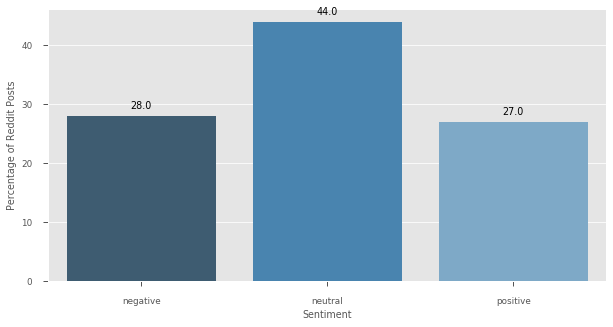

In [38]:
# Visualise percentage of posts with each sentiment

#### Plot settings ####
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
matplotlib.rcParams['font.family'] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = [10, 5]
sns.set_context('paper')
####

# ax = sns.countplot(x="sentiment_label",
#                     data=posts_persentiment,
# #                     order = "num_posts",
#                     palette=("Blues_d"))

ax = sns.barplot(x="sentiment_label",
                 y="percentage_of_total",
                 data=posts_persentiment,
                 palette=("Blues_d")
                )

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax.set(xlabel='Sentiment', ylabel='Percentage of Reddit Posts')

# def change_width(ax, new_value) :
#     for patch in ax.patches :
#         current_width = patch.get_width()
#         diff = current_width - new_value

#         # we change the bar width
#         patch.set_width(new_value)

#         # we recenter the bar
#         patch.set_x(patch.get_x() + diff * .5)

# change_width(ax, .35)

# plt.savefig('reddit_sentiment.png', dpi=400, bbox_inches="tight")